In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('Du_lieu_dt_5.csv')
df['Gia']=df['Gia'].replace('[*₫Giá dự kiến: .]','',regex=True)
df['Gia']=pd.to_numeric(df['Gia']).astype(int)
df=df.dropna(axis=0,how='any')


Task: Tính doanh thu của từng nhà sản xuất, vẽ biểu đồ, thương hiệu nào bán chạy nhất kể từ khi ra mắt

Product has most sales is iPhone with 41840640000 sales


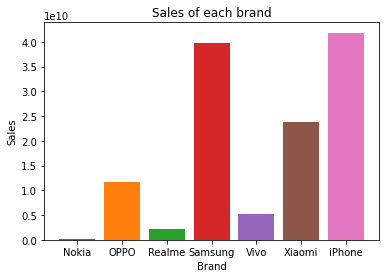

In [2]:
import numpy as np
import matplotlib.pyplot as plt
df1=df
df1['Sales']=df['Gia']*df['So Luong']
df1.head()
sale_values=df1.groupby('Brand').sum()['Sales']
sale_values
for i,y in sale_values.items():
    plt.bar(i,y)
    plt.xlabel('Brand')
    plt.ylabel('Sales')
    plt.title('Sales of each brand')
    if y==sale_values.max():
        print('Product has most sales is',i,'with',y,'sales')



Task: Tìm những chiếc điện thoại bán chạy và được đánh giá cao trong tầm giá 8 triệu đồng, trong đó điện thoại nào bán được nhiều nhất

In [3]:
df2=df
df2_tmp=df2.loc[(df2['Gia']<8000000)&(df2['Danh gia']>=4)&(df2['Gia']>5000000)]
most_brn=df2_tmp.loc[:,['Name','Brand','Gia','Danh gia','So Luong']]

most_brn.sort_values(by='So Luong',ascending=False,inplace=True)
most_brn




,Name,Brand,Gia,Danh gia,So Luong
48,Điện thoại OPPO A95,OPPO,6990000,4.0,262
42,Điện thoại OPPO Reno4 Pro,OPPO,7990000,4.1,142
53,Điện thoại Xiaomi Redmi Note 10S 6GB,Xiaomi,5990000,4.0,121
52,Điện thoại OPPO A76,OPPO,5990000,4.3,47
49,Điện thoại Vivo Y33s,Vivo,6990000,4.1,32


Product has most quanity is Điện thoại OPPO A95 with 262 sales


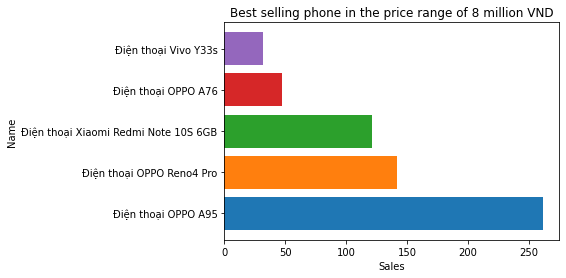

In [4]:
tm_mst=most_brn.groupby('Name').max()['So Luong'].sort_values(ascending=False)

for i, y in tm_mst.items():
    plt.barh(i,y)
    plt.ylabel('Name')
    plt.xlabel('Sales')
    plt.title('Best selling phone in the price range of 8 million VND')
    if y==tm_mst.max():
        print('Product has most quanity is',i,'with',y,'sales')

Task: Tìm những chiếc điện thoại có sử dụng chip Snapdragon, đánh giá xem những chiếc điện thoại sử dụng chip Snap có đem lại tiềm năng không?

In [5]:
def chip_snd(st1):
    st1=st1.split(' ')[0]
    return st1

In [6]:



df.head()
df3=df.loc[:,['Name','Chip','Danh gia']]
df3['Chip Sn']=df3['Chip'].apply(chip_snd)
snd_tmp=df3.loc[(df3['Chip Sn']=='Snapdragon')]
snd_tmp2=snd_tmp.groupby('Chip')
snd_tmp2_avg=snd_tmp2.mean()
snd_tmp2_avg=round(snd_tmp2_avg.reset_index(),1)
snd_tmp2_avg
    




,Chip,Danh gia
0,Snapdragon 480 8 nhân 5G,3.1
1,Snapdragon 662,4.0
2,Snapdragon 680 8 nhân,4.1
3,Snapdragon 695 5G 8 nhân,3.4
4,Snapdragon 720G,3.6
5,Snapdragon 730,3.2
6,Snapdragon 732G,3.2
7,Snapdragon 765G,3.5
8,Snapdragon 778G 5G 8 nhân,3.8
9,Snapdragon 8 Gen 1 8 nhân,4.3


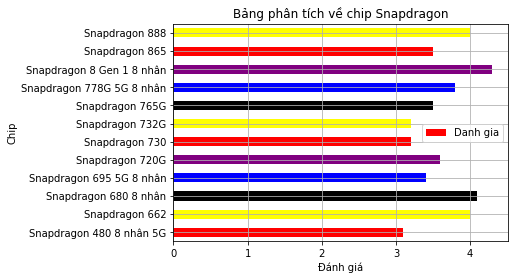

In [7]:

c = ['red', 'yellow', 'black', 'blue', 'purple']

snd_tmp2_avg.plot(x='Chip',y='Danh gia',kind='barh',color=c)
plt.title('Bảng phân tích về chip Snapdragon')
plt.xlabel('Đánh giá')
plt.grid()
plt.show()

Task: Những sản phẩm nào bán được nhiều nhất, đưa ra giả thuyết.

C:\Users\Admin\AppData\Local\Temp\ipykernel_13784\394737854.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df4_tmp['Name'],rotation=90)


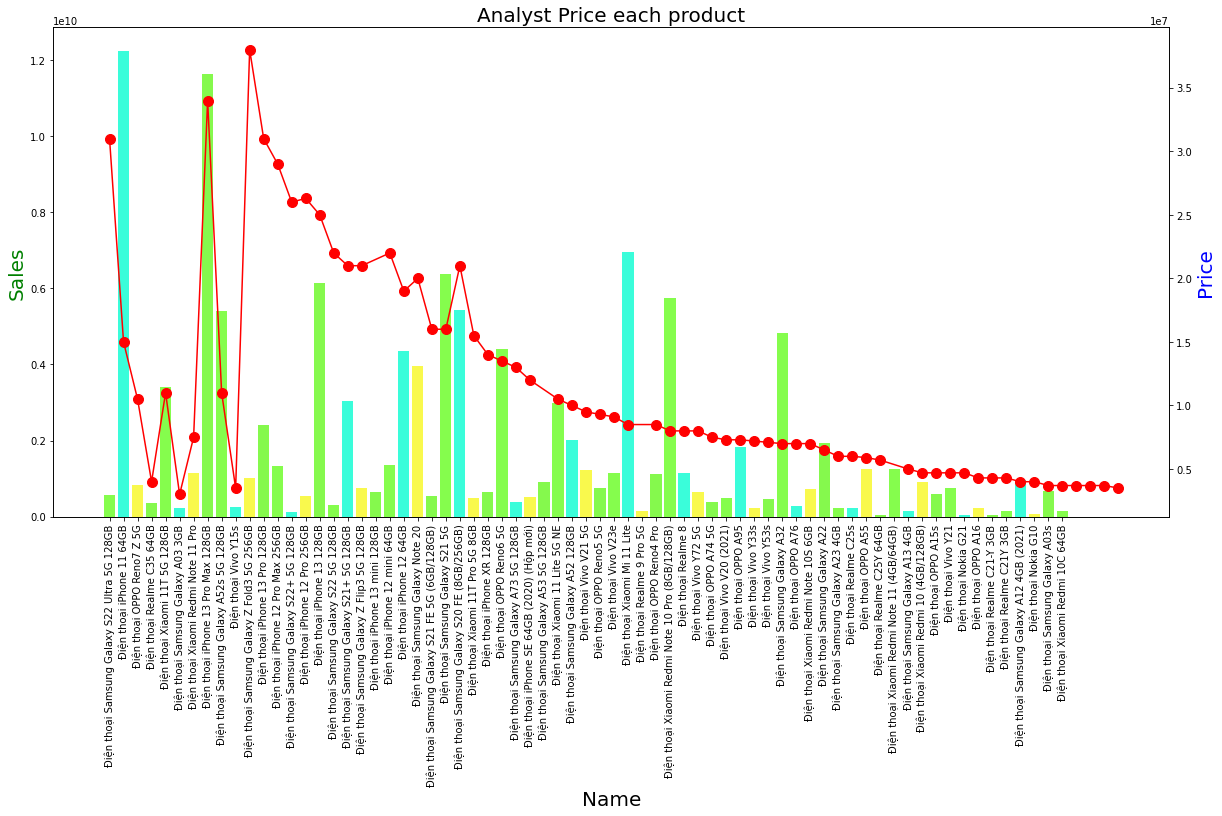

In [8]:
df4=df
df4['Sales']=df4['Gia']*df4['So Luong']
df4_tmp=df4.loc[:,['Name','Gia','Sales']]

c=['#85fd4d','#3afdda','#f9f94d','#85f94d']
plt.figure(figsize=(20,9))
ax1=plt.subplot()
ax1.bar(df4_tmp['Name'],df4_tmp['Sales'],color=c)
ax2=ax1.twinx()


ax1.set_xlabel('Name',fontsize=20)
ax2.plot(df4_tmp['Gia'],color='red',marker='.',markersize=20)
ax2.set_ylabel('Price',color='blue',fontsize=20)
ax1.set_ylabel('Sales',color='green',fontsize=20)
ax1.set_xticklabels(df4_tmp['Name'],rotation=90)
plt.title('Analyst Price each product',fontsize=20)
plt.show()

In [31]:
import pandas as pd
pth = 'Du_lieu_dt_5.csv'
df = pd.read_csv(pth)
pd.unique(df["Chip"])

col_list = ['Processors','Rank']
df_rank = pd.read_csv('Smartphone-Processors-Rating.csv', usecols=col_list,index_col=0,squeeze=True)
rank_dict = df_rank.to_dict()

chip_column = df["Chip"]
price_column = df["Gia"]

xep_hang = []

for i in range(len(df)):
    chip_rank = chip_column[i]
    phone_price = ((price_column[i]).replace(".",""))[:-2]
    phone_price = phone_price.replace("Giá dự kiến: ","")
    rank = rank_dict.get(chip_rank)
    if rank == None:
        rank = 0
    result = rank * int(phone_price) 
    #print(result)
    
    xep_hang.append(result)

df['Hieu nang / Gia'] = xep_hang

#df2 = df2.loc[df2['Gia'] < 10000000]
df2['Gia']=df['Gia'].replace('[*₫Giá dự kiến: .]','',regex=True)
#df3 = df2.loc[df2['Gia'] < 10000000]
df2 = = df2.loc[df2['Gia'] < 10000000]

#(df3.sort_values(['Hieu nang / Gia'])).head(5)


C:\Users\Admin\AppData\Local\Temp\ipykernel_13784\326568376.py:7: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df_rank = pd.read_csv('Smartphone-Processors-Rating.csv', usecols=col_list,index_col=0,squeeze=True)


,Name,Brand,Display,HDH,Camera sau,Camera trước,Chip,Ram,Rom,Sim,Battery,Charge,Gia,Danh gia,So Luong,Hieu nang / Gia
1,Điện thoại iPhone 11 64GB,iPhone,"IPS LCD,6.1"",Liquid Retina",iOS 15,2 camera 12 MP,12 MP,Apple A13 Bionic,4 GB,64 GB,1 Nano SIM & 1 eSIM,3110 mAh,18 W,14990000,4.0,817,17988000
4,Điện thoại Xiaomi 11T 5G 128GB,Xiaomi,"AMOLED,6.67"",Full HD+",Android 11,"Chính 108 MP & Phụ 8 MP, 5 MP",16 MP,MediaTek Dimensity 1200,8 GB,128 GB,2 Nano SIM,5000 mAh,67 W,10990000,3.8,310,186830000
7,Điện thoại iPhone 13 Pro Max 128GB,iPhone,"OLED,6.7"",Super Retina XDR",iOS 15,3 camera 12 MP,12 MP,Apple A15 Bionic,6 GB,128 GB,1 Nano SIM & 1 eSIM,4352 mAh,20 W,33990000,4.6,342,3399000
9,Điện thoại Vivo Y15s,Vivo,"IPS LCD,6.51"",HD+",Android 11 (Go Edition),Chính 13 MP & Phụ 2 MP,8 MP,MediaTek Helio P35,3 GB,32 GB,2 Nano SIM,5000 mAh,10 W,3490000,3.4,74,401350000
11,Điện thoại iPhone 13 Pro 128GB,iPhone,"OLED,6.1"",Super Retina XDR",iOS 15,3 camera 12 MP,12 MP,Apple A15 Bionic,6 GB,128 GB,1 Nano SIM & 1 eSIM,3095 mAh,20 W,30990000,4.3,78,3099000
12,Điện thoại iPhone 12 Pro Max 256GB,iPhone,"OLED,6.7"",Super Retina XDR",iOS 15,3 camera 12 MP,12 MP,Apple A14 Bionic,6 GB,256 GB,1 Nano SIM & 1 eSIM,3687 mAh,20 W,28990000,4.0,46,115960000
14,Điện thoại iPhone 12 Pro 256GB,iPhone,"OLED,6.1"",Super Retina XDR",iOS 15,3 camera 12 MP,12 MP,Apple A14 Bionic,6 GB,256 GB,1 Nano SIM & 1 eSIM,2815 mAh,20 W,26290000,3.5,21,105160000
15,Điện thoại iPhone 13 128GB,iPhone,"OLED,6.1"",Super Retina XDR",iOS 15,2 camera 12 MP,12 MP,Apple A15 Bionic,4 GB,128 GB,1 Nano SIM & 1 eSIM,3240 mAh,20 W,24990000,4.4,246,2499000
17,Điện thoại Samsung Galaxy S21+ 5G 128GB,Samsung,"Dynamic AMOLED 2X,6.7"",Full HD+",Android 11,"Chính 12 MP & Phụ 64 MP, 12 MP",10 MP,Exynos 2100,8 GB,128 GB,2 Nano SIM hoặc 1 Nano SIM + 1 eSIM,4800 mAh,25 W,20990000,3.0,145,230890000
20,Điện thoại iPhone 13 mini 128GB,iPhone,"OLED,5.4"",Super Retina XDR",iOS 15,2 camera 12 MP,12 MP,Apple A15 Bionic,4 GB,128 GB,1 Nano SIM & 1 eSIM,2438 mAh,20 W,21990000,4.4,29,2199000
